In [21]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [15]:
# load example dataset
gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [16]:
# view dataset
gdf.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"(POLYGON ((180 -16.06713266364245, 180 -16.555..."
1,53950935,Africa,Tanzania,TZA,150600.0,POLYGON ((33.90371119710453 -0.950000000000000...
2,603253,Africa,W. Sahara,ESH,906.5,POLYGON ((-8.665589565454809 27.65642588959236...
3,35623680,North America,Canada,CAN,1674000.0,"(POLYGON ((-122.84 49.00000000000011, -122.974..."
4,326625791,North America,United States of America,USA,18560000.0,"(POLYGON ((-122.84 49.00000000000011, -120 49...."


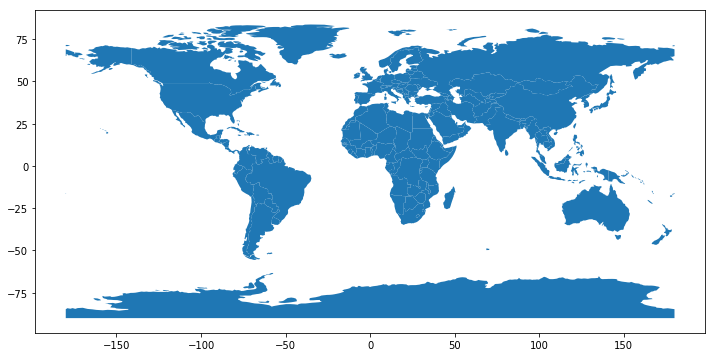

In [23]:
# plot polygons
fig, ax = plt.subplots(figsize=(12,8))
gdf.plot(ax=ax)

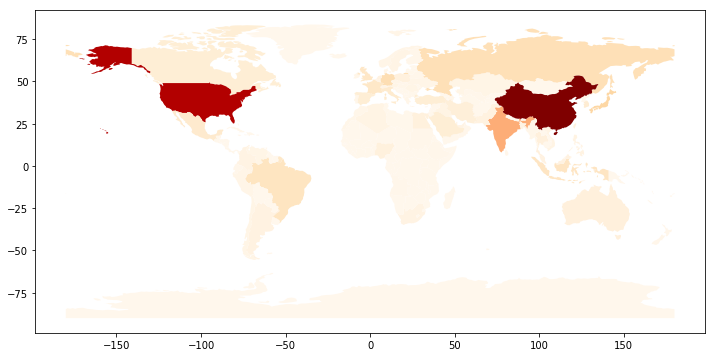

In [25]:
# plot choropleth
fig, ax = plt.subplots(figsize=(12,8))
gdf.plot(column='gdp_md_est', ax=ax, cmap='OrRd')

In [ ]:
from shapely.geometry import Polygon

geometry = [Point(xy) for xy in zip(df.lon, df.lat)]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

gdf['geometry'] = gdf['geometry'].apply(lambda x: x.coords[0])
gdf = gdf.groupby(['label'])['geometry'].apply(lambda x: Polygon(x.tolist())).reset_index()

# Declare the result as a new a GeoDataFrame
gdf = gpd.GeoDataFrame(gdf, geometry = 'geometry')

gdf.to_file("output.shp")